Dataset imported from http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

Dataset Description 1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [59]:
#importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

In [60]:
dataset=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data")

In [61]:
dataset.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [62]:
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [63]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (568, 32)


In [64]:
headerList = ['id', 'diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension',
              'SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension',
              'worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']
# converting data frame to csv
dataset.to_csv("cancer.csv", header=headerList, index=False)

In [65]:
dataset = pd.read_csv('cancer.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [66]:
dataset.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [67]:
dataset.shape

(568, 32)

Finding the diagnosis cell related info

In [68]:
dataset['diagnosis'].describe()

count     568
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

Thus benign types entries are 357 and malign are hence 568-357=211

Visualizing the data

In [69]:
lis1=headerList[2:]
lis1

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave points',
 'mean_symmetry',
 'mean_fractal dimension',
 'SE_radius',
 'SE_texture',
 'SE_perimeter',
 'SE_area',
 'SE_smoothness',
 'SE_compactness',
 'SE_concavity',
 'SE_concave points',
 'SE_symmetry',
 'SE_fractal dimension',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave points',
 'worst_symmetry',
 'worst_fractal dimension']

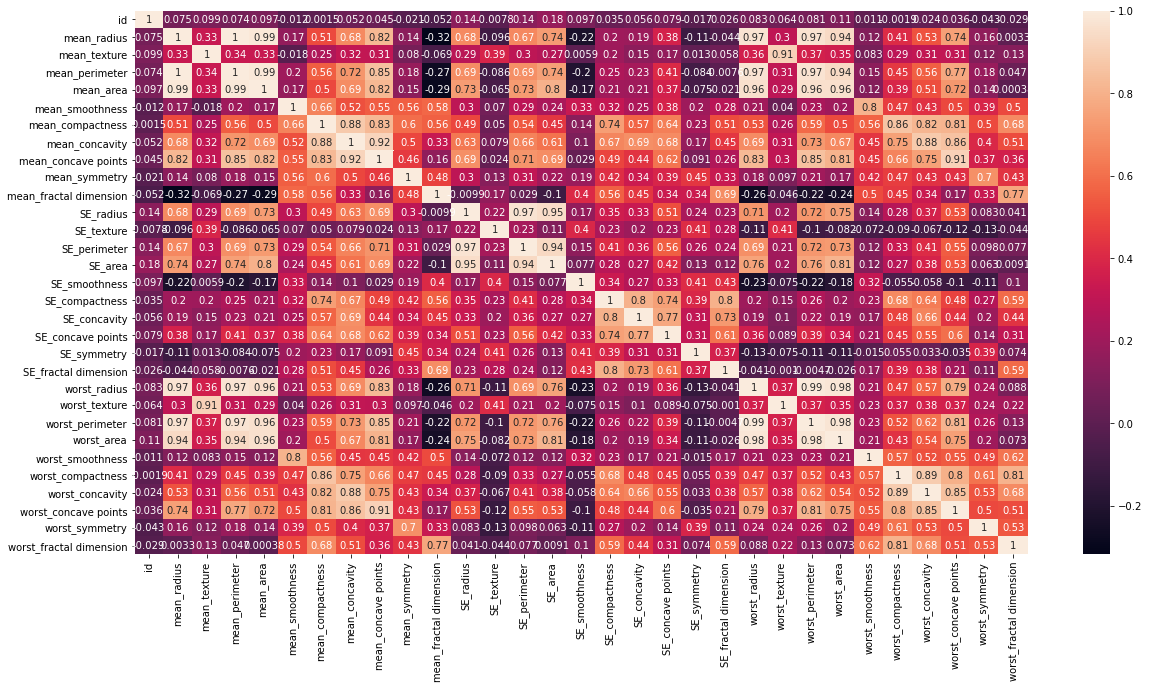

In [70]:
cor=dataset.corr()
fig=plt.figure(figsize=(20,10))
b=sns.heatmap(cor,annot=True)

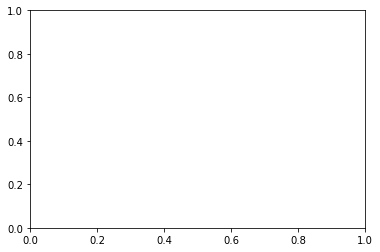

In [87]:
for name in lis1:
    plotdata=dataset[name]
    a=plotdata.plot(kind="hist");
    a.figure.savefig(r'C:\Users\saniy\Downloads\mini\graph_images\ '+name)
    a.clear()

In [93]:
images=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']

Displaying the graphs thus generated

<B>MEAN VALUE GRAPHS</B>

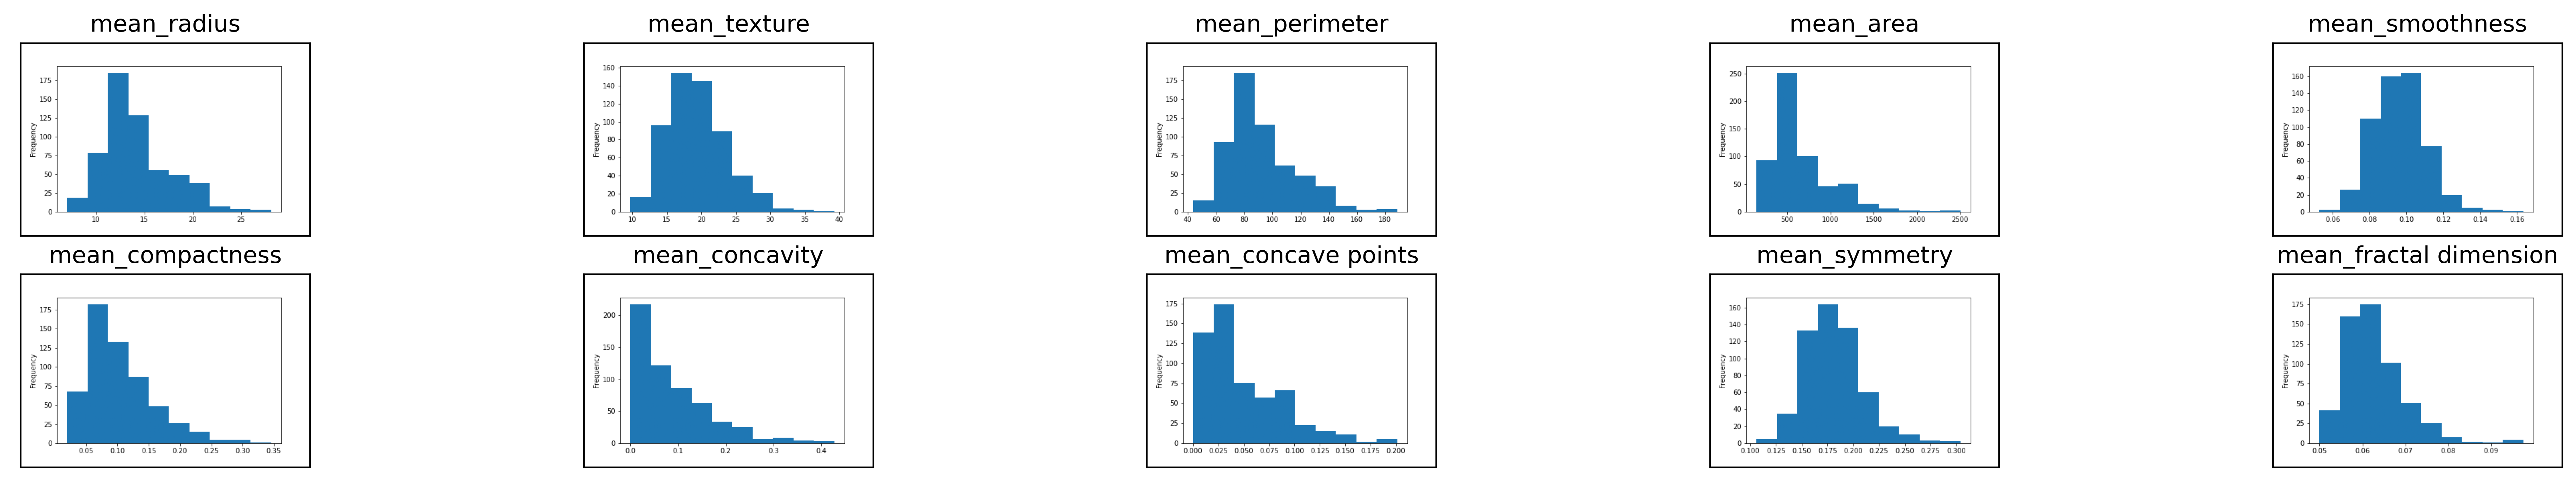

In [101]:
i=0
fig = plt.figure(figsize=(25, 4),dpi=400)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    mpimg_img = mpimg.imread(os.path.join(r'C:\Users\saniy\Downloads\mini\graph_images', images[i]+'.png')) 
    ax.imshow(mpimg_img)
    ax.set_title(images[i])
    i+=1

<B>SE VALUE GRAPHS</B>

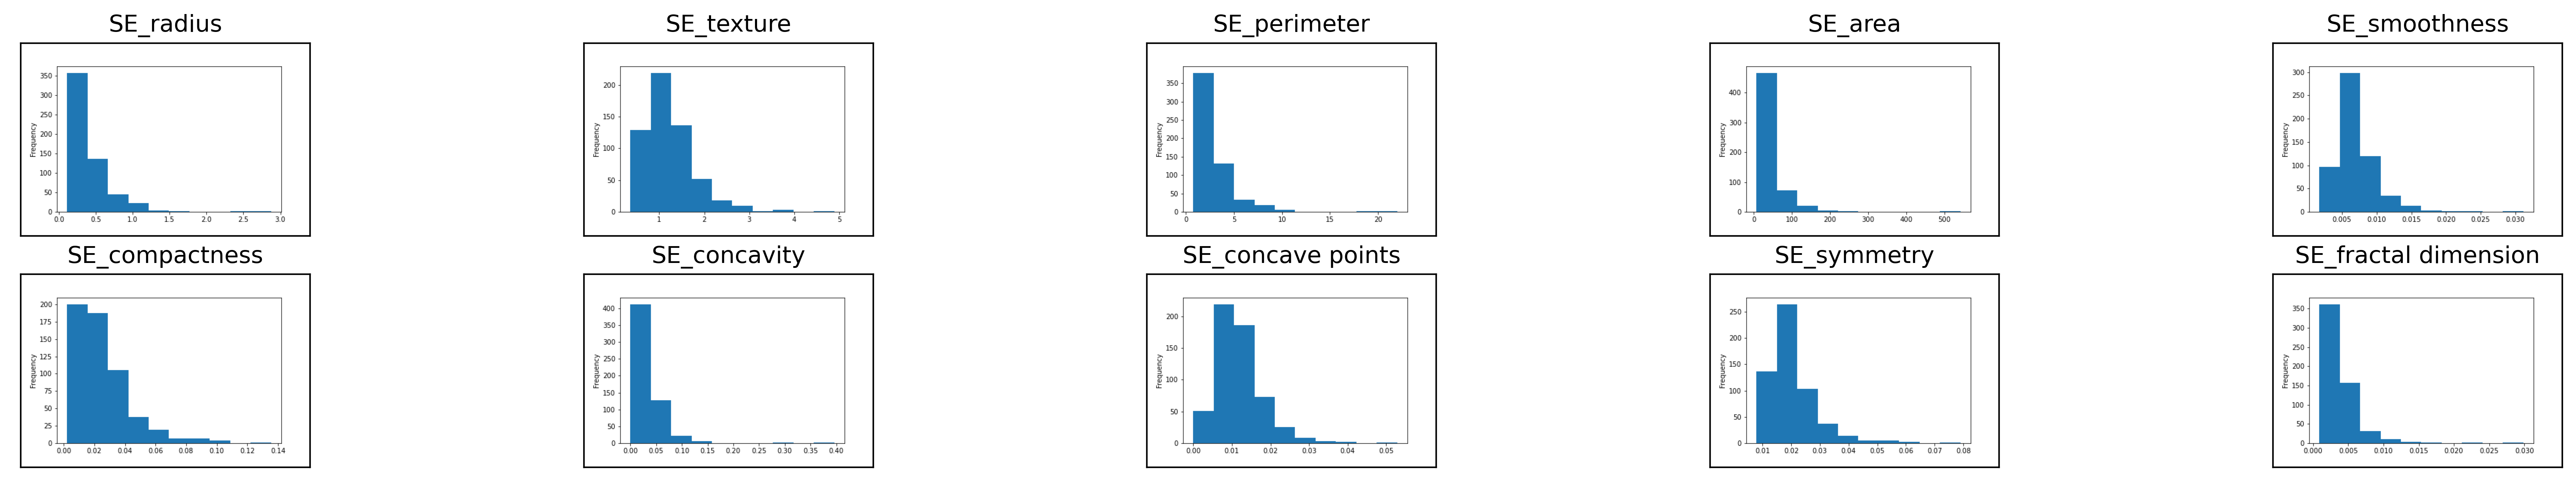

In [102]:
i=10
fig = plt.figure(figsize=(25, 4),dpi=400)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    mpimg_img = mpimg.imread(os.path.join(r'C:\Users\saniy\Downloads\mini\graph_images', images[i]+'.png')) 
    ax.imshow(mpimg_img)
    ax.set_title(images[i])
    i+=1

<B>WORST VALUE GRAPHS</B>

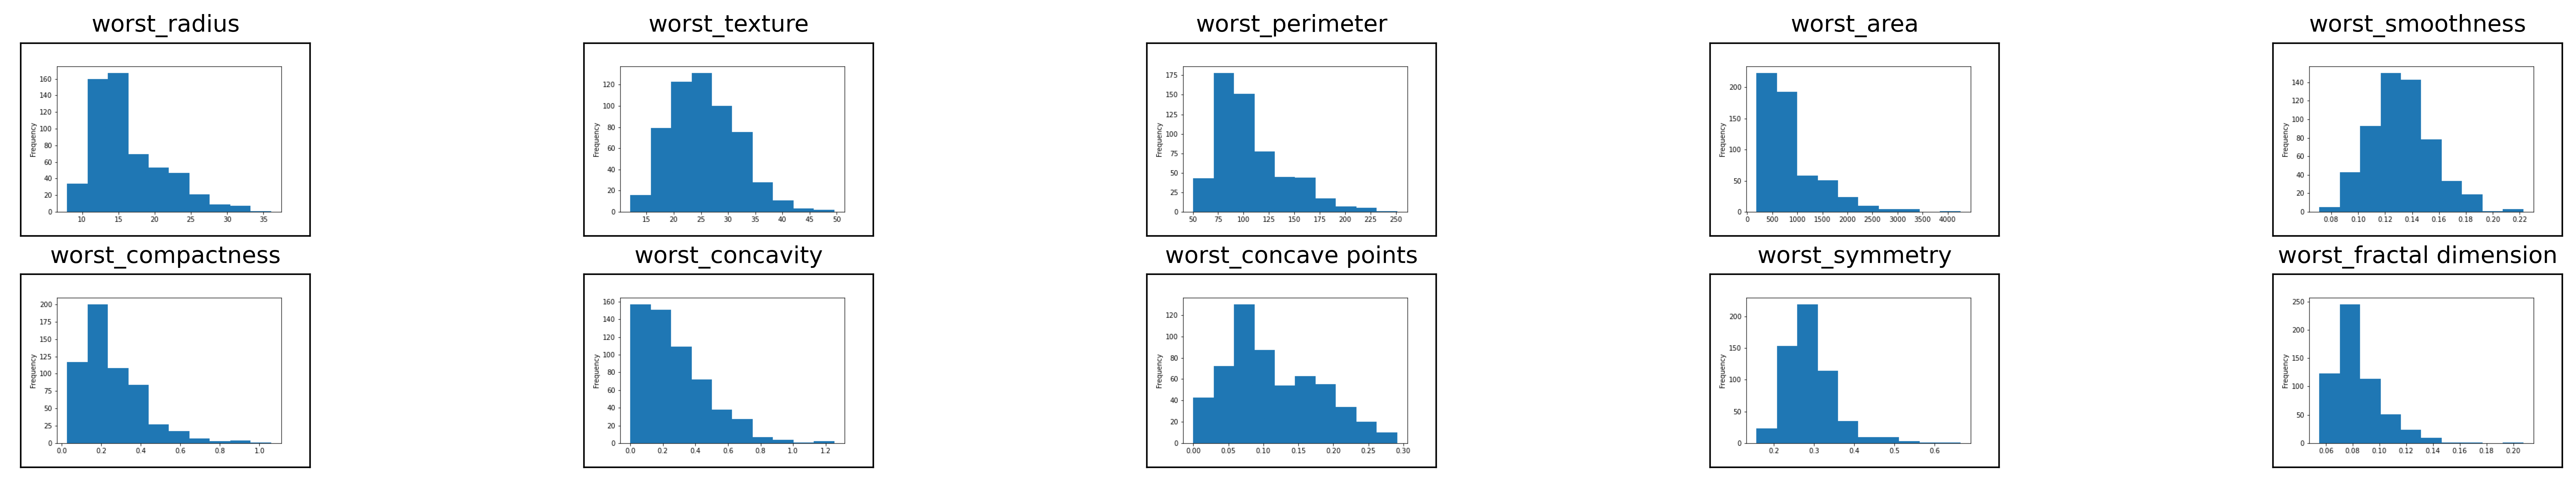

In [103]:
i=20
fig = plt.figure(figsize=(25, 4),dpi=400)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    mpimg_img = mpimg.imread(os.path.join(r'C:\Users\saniy\Downloads\mini\graph_images', images[i]+'.png')) 
    ax.imshow(mpimg_img)
    ax.set_title(images[i])
    i+=1

Inference: The dataset contains features highly varying in magnitudes, units and range and thus needs to be scaled accordingly. Also the data is skewed at times to the left or right and hence needs to be normalised too.

<B>Missing or Null Data points</B>

We can find any missing or null data points of the data set (if there is any) using the following pandas function.

In [71]:
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave points        0
mean_symmetry              0
mean_fractal dimension     0
SE_radius                  0
SE_texture                 0
SE_perimeter               0
SE_area                    0
SE_smoothness              0
SE_compactness             0
SE_concavity               0
SE_concave points          0
SE_symmetry                0
SE_fractal dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave points       0
worst_symmetry             0
worst_fractal dimension    0
dtype: int64

Since there arent any null values present in the dataset we dont need to unecessarily delete any rows.

Categorical Data to Numerical Data thus easing the ML process Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

In [72]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
dataset['diagnosis'] = labelencoder_Y.fit_transform(dataset['diagnosis'])

In [73]:
dataset.tail()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Thus we have converted the categorical diagnosis to numerical with malign being 1

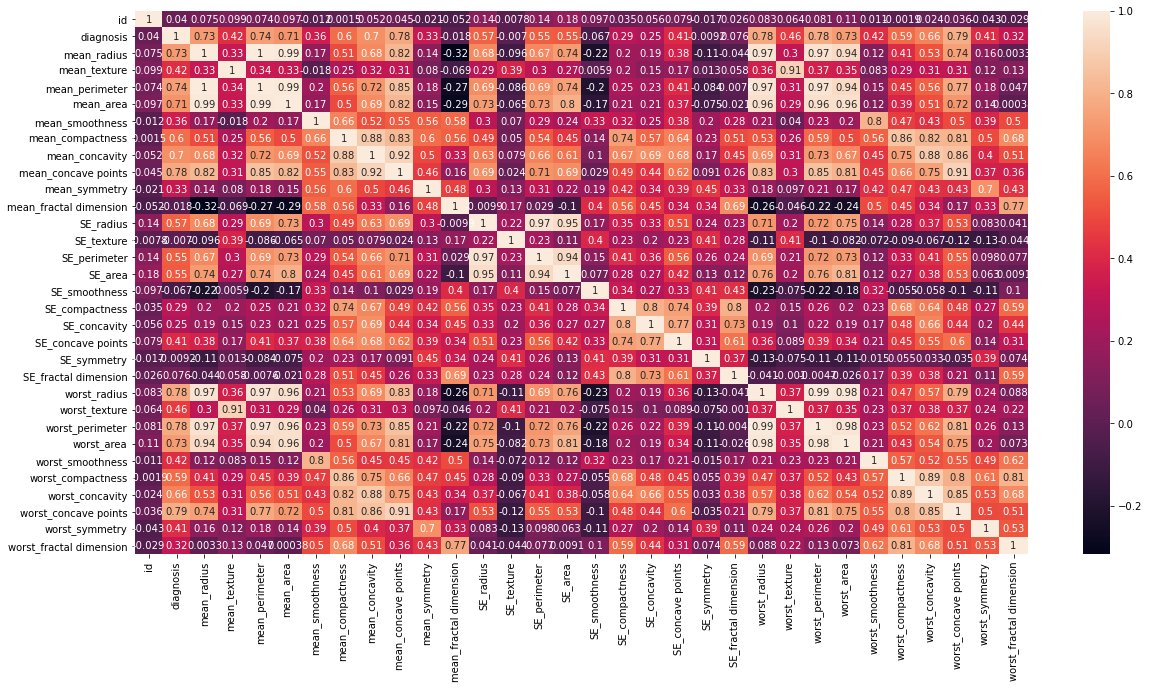

In [74]:
cor=dataset.corr()
fig=plt.figure(figsize=(20,10))
b=sns.heatmap(cor,annot=True)

In [75]:
minM=dataset[dataset['diagnosis']==1]
minB=dataset[dataset['diagnosis']==0]

<B>Splitting the dataset</B>

In [76]:
X=dataset.drop(['diagnosis'],axis=1)
X.head()

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [77]:
Y=dataset['diagnosis']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [78]:
X=X.iloc[:,[21, 18,  8,  3,  7, 28, 23, 24]]

In [79]:
from imblearn.over_sampling import SMOTE
import collections

In [81]:
smt=SMOTE()
X_sm,y_sm=smt.fit_resample(X,Y)
y_sm.value_counts()

0    357
1    357
Name: diagnosis, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

<B>Feature Scaling</B>

We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that transforming the data so that it fits within a specific scale, like 0–100 or 0–1. We will use StandardScaler method from SciKit-Learn library.

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Example of a single entry in the data thus produced

In [84]:
X_test[0]

array([ 0.09929374, -0.49918737, -0.14772949,  0.08324292, -0.09446394,
       -0.36793942,  0.02924088, -0.02906542])

False Negative (FN): It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative.

Thus FN is of much importance to us because if a breast cancer patient is shown as not having breast cancer it would be a potential threat to her life as compared to if a non breast cancer patient is shown as having breast cancer in which case she could be sent for further testing

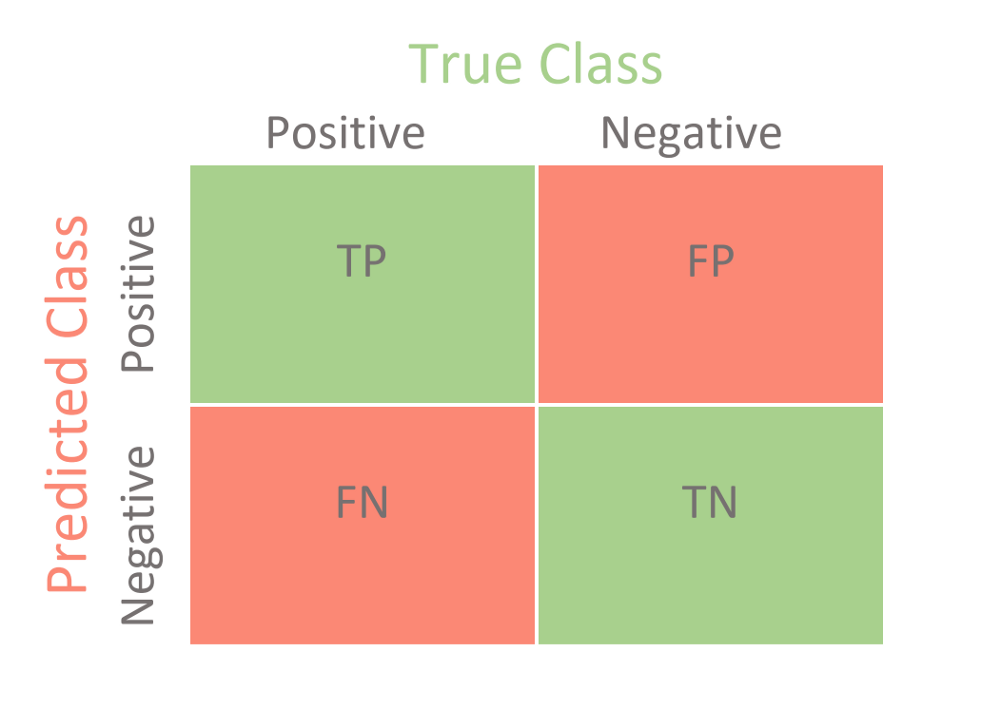

In [85]:
from IPython.display import Image
Image(filename=r'C:\Users\saniy\Downloads\ml_proj\Confusion_matrix.png', width=300)

<B>Precision</B>: It tells you what fraction of predictions as a positive class were actually positive. To calculate precision, use the following formula: TP/(TP+FP).

<B>Recall</B>: It tells you what fraction of all positive samples were correctly predicted as positive by the classifier. It is also known as True Positive Rate (TPR), Sensitivity, Probability of Detection. To calculate Recall, use the following formula: TP/(TP+FN).

<B>F1-score</B>: It combines precision and recall into a single measure. Mathematically it’s the harmonic mean of precision and recall. It can be calculated as follows:

In [86]:
X

,worst_radius,SE_concave points,mean_concave points,mean_perimeter,mean_concavity,worst_concave points,worst_perimeter,worst_area
0,24.990,0.01340,0.07017,132.90,0.08690,0.1860,158.80,1956.0
1,23.570,0.02058,0.12790,130.00,0.19740,0.2430,152.50,1709.0
2,14.910,0.01867,0.10520,77.58,0.24140,0.2575,98.87,567.7
3,22.540,0.01885,0.10430,135.10,0.19800,0.1625,152.20,1575.0
4,15.470,0.01137,0.08089,82.57,0.15780,0.1741,103.40,741.6
...,...,...,...,...,...,...,...,...
563,25.450,0.02454,0.13890,142.00,0.24390,0.2216,166.10,2027.0
564,23.690,0.01678,0.09791,131.20,0.14400,0.1628,155.00,1731.0
565,18.980,0.01557,0.05302,108.30,0.09251,0.1418,126.70,1124.0
566,25.740,0.01664,0.15200,140.10,0.35140,0.2650,184.60,1821.0


#### Model Selection



#### Using Logistic Regression Algorithm to the Training Set

In [87]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

Predicting the results on the test dataset

In [88]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [90]:
cm

array([[90,  2],
       [ 6, 44]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.94
Precision: 0.96
Recall: 0.88
F1-score: 0.92
Sensitivity:0.98
Specificity: 0.88


#### Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

In [92]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

Predicting the results on the test dataset

In [93]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [95]:
cm

array([[88,  4],
       [ 6, 44]], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.93
Precision: 0.92
Recall: 0.88
F1-score: 0.90
Sensitivity:0.96
Specificity: 0.88


#### Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

In [97]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the results on the test dataset

In [98]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [100]:
cm

array([[86,  6],
       [ 6, 44]], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.92
Precision: 0.88
Recall: 0.88
F1-score: 0.88
Sensitivity:0.93
Specificity: 0.88


#### Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm



In [102]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Predicting the results on the test dataset



In [103]:
Y_pred = classifier.predict(X_test)


Testing via the confusion matrix



In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [105]:
cm

array([[91,  1],
       [ 8, 42]], dtype=int64)

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.94
Precision: 0.98
Recall: 0.84
F1-score: 0.90
Sensitivity:0.99
Specificity: 0.84


In [107]:
#classifier.feature_importances_

Top 8 most important features

In [108]:
#n=8
#a=[np.argsort( classifier.feature_importances_)[-n:]]
#a

In [109]:
#X.iloc[:,[21, 18,  8,  3,  7, 28, 23, 24]]

In [110]:
#plt.barh(X.columns, classifier.feature_importances_)

#### Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm



In [111]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Predicting the results on the test dataset



In [112]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix



In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [114]:
cm

array([[87,  5],
       [ 5, 45]], dtype=int64)

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.93
Precision: 0.90
Recall: 0.90
F1-score: 0.90
Sensitivity:0.95
Specificity: 0.90


#### Using SVC method of svm class to use Support Vector Machine Algorithm

In [116]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

Predicting the results on the test dataset

In [117]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [119]:
cm

array([[90,  2],
       [ 7, 43]], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.94
Precision: 0.96
Recall: 0.86
F1-score: 0.91
Sensitivity:0.98
Specificity: 0.86


#### Using SVC method of svm class to use Kernel SVM Algorithm

In [121]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

Predicting the results on the test dataset

In [122]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [124]:
cm

array([[91,  1],
       [ 6, 44]], dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.95
Precision: 0.98
Recall: 0.88
F1-score: 0.93
Sensitivity:0.99
Specificity: 0.88


ANN

In [126]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [127]:
#creating model
classifier = Sequential()

In [128]:
#first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=8))
#second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [129]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [130]:
#fitting the ANN to the training set
model = classifier.fit(X_train, Y_train, batch_size=100, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.9249
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.9249
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.9202
Epoch 4/100
5/5 [==============================] - 0s 997us/step - loss: 0.4006 - accuracy: 0.9225
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.9272
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.9272
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.9296
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.9296
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.9296
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.9296
Epoch 11/100
5/5 [=========

In [131]:
Y_pred=classifier.predict(X_test)
Y_pred=(Y_pred>0.5)
Y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [132]:
cm=confusion_matrix(Y_test, Y_pred)
print(cm)

[[88  4]
 [ 6 44]]


In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.93
Precision: 0.92
Recall: 0.88
F1-score: 0.90
Sensitivity:0.96
Specificity: 0.88


XGBOOST

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [136]:
from xgboost import XGBClassifier

In [137]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, Y_train)

[15:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
score = xgb_clf.score(X_test, Y_test)
print(score)

0.9295774647887324


In [139]:
Y_pred = xgb_clf.predict(X_test)
Y_pred = [round(value) for value in Y_pred]

In [140]:
cm=confusion_matrix(Y_test, Y_pred)
print(cm)

[[89  3]
 [ 7 43]]


In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred)))
print('Sensitivity:{:.2f}'.format(sensitivity))
print('Specificity: {:.2f}'.format(specificity))


Accuracy: 0.93
Precision: 0.93
Recall: 0.86
F1-score: 0.90
Sensitivity:0.97
Specificity: 0.86
